In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# take in the downloaded csv data over a 10-year period and merge it into one database
# export the database to a CSV for the rest of the group to download 
db15 = pd.read_csv('2015.csv')
db16 = pd.read_csv('2016.csv')
db17 = pd.read_csv('2017.csv')
db18 = pd.read_csv('2018.csv')
db19 = pd.read_csv('2019.csv')
db20 = pd.read_csv('2020.csv')
db21 = pd.read_csv('2021.csv')
db22 = pd.read_csv('2022.csv')
db23 = pd.read_csv('2023.csv')
db24 = pd.read_csv('2024.csv')
db25 = pd.read_csv('2025.csv')
# concatenating the data over each year into one dataframe 
frames = [db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25]
mergedResults = pd.concat(frames)
# merging the results into a CSV 
mergedResults.to_csv('Merged10yrdata.csv', index=False) 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'landing'),
  Text(1, 0, 'enroute'),
  Text(2, 0, 'takeoff'),
  Text(3, 0, 'approach'),
  Text(4, 0, 'initial climb'),
  Text(5, 0, 'maneuvering'),
  Text(6, 0, 'taxi'),
  Text(7, 0, 'standing'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'emergency descent'),
  Text(10, 0, 'uncontrolled descent'),
  Text(11, 0, 'pushback/tow'),
  Text(12, 0, 'after landing'),
  Text(13, 0, 'post-impact')])

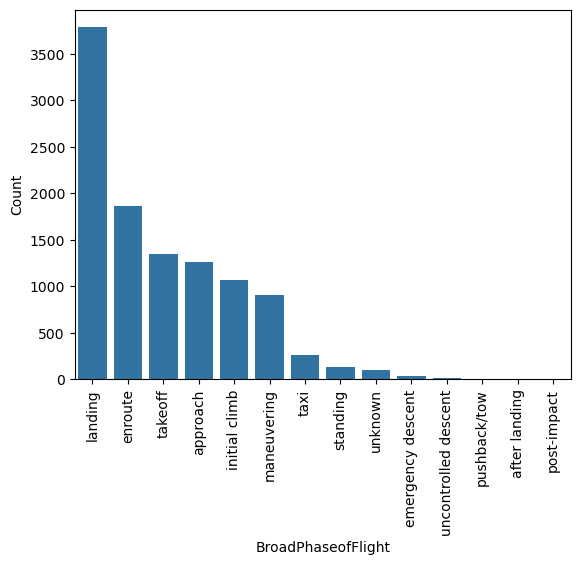

In [4]:
#Create a visualization that compares Makes of planes  and the broad phase of flight (approach, initial climb, landing) [STACKED BAR CHART]

# cleaning up the data 
sortedDB = pd.read_csv('Merged10yrdata.csv', low_memory=False)
sortedDB['Make'] = sortedDB['Make'].str.lower()
sortedDB['BroadPhaseofFlight'] = sortedDB['BroadPhaseofFlight'].str.lower()
# sort out incidents that only occurred in the US and are categorized as AIR
filteredOutCountry = sortedDB[(sortedDB['Country'] == 'United States') & (sortedDB['AirCraftCategory'] == 'AIR')]
# sample = filteredOutCountry[['EventType', 'EventDate','Make', 'BroadPhaseofFlight']]
# print(sample)
# group by make and phase of flight 
results = filteredOutCountry[[ 'EventDate','Make', 'BroadPhaseofFlight']].groupby(['Make', 'BroadPhaseofFlight']).count().reset_index()

# rename columns
results = results.rename(columns={'EventDate': 'Count'})
# results.to_csv('results.csv', index=False) 
# print(results)
sumByPhase = results.groupby('BroadPhaseofFlight')['Count'].sum().reset_index()
# print(sumByPhase)
sumByPhase = sumByPhase.sort_values(by='Count', ascending=False)
# print(sumByPhase)

plot = sns.barplot(x='BroadPhaseofFlight', y='Count', data= sumByPhase)
plt.xticks(rotation=90)



        Make    BroadPhaseofFlight  Count  Total    Percent
0     cessna               landing   1298   3148  41.232529
1      piper               landing    630   1895  33.245383
2     cessna               enroute    492   3148  15.628971
3     cessna               takeoff    388   3148  12.325286
4      piper               enroute    348   1895  18.364116
5     cessna              approach    342   3148  10.864041
6      piper              approach    244   1895  12.875989
7     cessna         initial climb    243   3148   7.719187
8      piper               takeoff    227   1895  11.978892
9      piper         initial climb    217   1895  11.451187
10    cessna           maneuvering    191   3148   6.067344
11     beech               landing    187    702  26.638177
12     beech               enroute    169    702  24.074074
13     piper           maneuvering    123   1895   6.490765
14     beech              approach    118    702  16.809117
15    cessna                  taxi    10

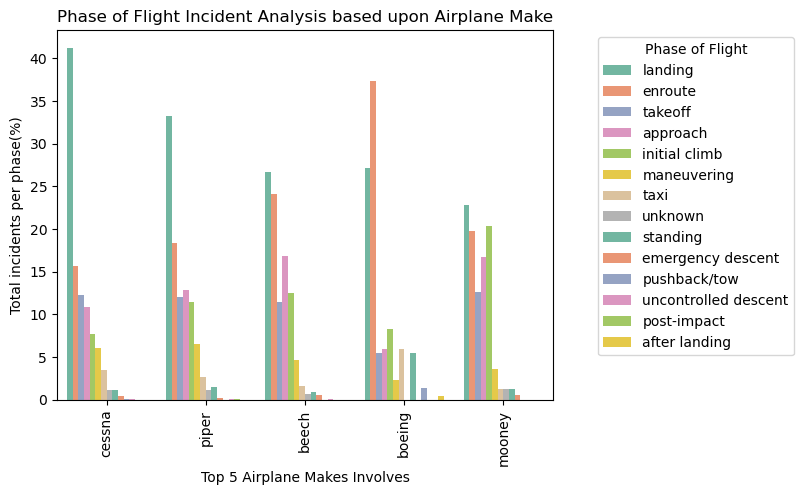

In [24]:
# getting the total count of flights by make 
sumByMake = results.groupby([ 'Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# calculating the sum of each make 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# sorting and column renaming 
totalSum = totalSum.sort_values(by='Count', ascending=False)
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
# calculating the percentage of each phase 
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
# print(sumByMake)
# to visually display the data correctly getting the top 5 makes that are represented in the data 
top_makes = sumByMake.groupby('Make')['Count'].sum().nlargest(5).index
top5 = sumByMake[sumByMake['Make'].isin(top_makes)]

print(top5)
# creating the bar plot and setting the axis' labels and title
plot = sns.barplot(x='Make', y='Percent', hue='BroadPhaseofFlight', data=top5, palette='Set2')
plot.set_xlabel("Top 5 Airplane Makes Involves")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Phase of Flight Incident Analysis based upon Airplane Make")
plt.xticks(rotation=90)
plt.legend(title="Phase of Flight", loc= 'upper right',  bbox_to_anchor=(1.5, 1))



/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_94299/498955144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split().str[0]
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_94299/498955144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split('-').str[0]


      Make BroadPhaseofFlight  Count  Total    Percent
0   airbus           approach      9     73  12.328767
1   airbus            enroute     38     73  52.054795
2   airbus      initial climb      5     73   6.849315
3   airbus            landing     10     73  13.698630
4   airbus       pushback/tow      1     73   1.369863
5   airbus           standing      1     73   1.369863
6   airbus            takeoff      6     73   8.219178
7   airbus               taxi      3     73   4.109589
8   boeing      after landing      1    220   0.454545
9   boeing           approach     13    220   5.909091
10  boeing            enroute     81    220  36.818182
11  boeing      initial climb     18    220   8.181818
12  boeing            landing     60    220  27.272727
13  boeing        maneuvering      5    220   2.272727
14  boeing       pushback/tow      3    220   1.363636
15  boeing           standing     12    220   5.454545
16  boeing            takeoff     14    220   6.363636
17  boeing

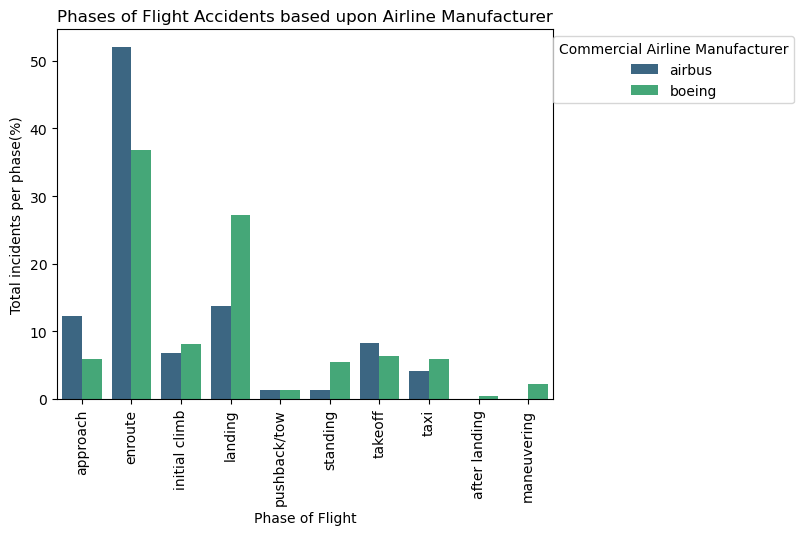

In [27]:
# since our term project only focuses on commercial airlines, I narrowed down data reflecting commercial flights which are Boeing and Airbus
commercial = results[results['Make'].str.contains('Boeing|Airbus', case=False, na=False)]
# including the data that may contain hypenated airline makes 
commercial['Make'] = commercial['Make'].str.split().str[0]
commercial['Make'] = commercial['Make'].str.split('-').str[0]
# print(commercial)
# getting a sum which is grouped by the make 
sumByMake = commercial.groupby(['Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

# sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# getting a total sum to calculate the percentage 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# renaming columns 
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
# creating the bar plot and renamed the axis' 
plot = sns.barplot(x='BroadPhaseofFlight', y='Percent', hue='Make', data=sumByMake, palette='viridis')
plot.set_xlabel("Phase of Flight")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Phases of Flight Accidents based upon Airline Manufacturer")
plt.xticks(rotation=90)

# # 9) Customize legend if necessary
plt.legend(title="Commercial Airline Manufacturer", loc= 'upper right',  bbox_to_anchor=(1.5, 1))

print(sumByMake)

# insert chi sqaure goal here 

In [ ]:

# creating a copy of the dataframe so that we do not modify the original dataframe in case of mistakes 
df = commercial.copy()
# since we dont have any incidents for airbus for after landing and maneuvering, we will merge this into other category  
df["BroadPhaseofFlight"] = df["BroadPhaseofFlight"].replace({"after landing": "others", "maneuvering": "others"})
# creating a table to get the side by side comparison for the two manufactors based on phase of flight 
contingency_table = pd.pivot_table(df, values="Count", index="BroadPhaseofFlight", columns="Make", fill_value=0, aggfunc="sum")
# get the totals 
contingency_table["Row Total"] = contingency_table.sum(axis=1)
contingency_table.loc["Column Total"] = contingency_table.sum(axis=0)
# print the table 
print(contingency_table)



Make                airbus  boeing  Row Total
BroadPhaseofFlight                           
approach                 9      13         22
enroute                 38      81        119
initial climb            5      18         23
landing                 10      60         70
others                   0       6          6
pushback/tow             1       3          4
standing                 1      12         13
takeoff                  6      14         20
taxi                     3      13         16
Column Total            73     220        293


In [5]:
pip install statsmodels


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm
# creating array for the chi-square test 
contingencyArray = np.array([[9, 13],[38, 81],[5, 18],[10, 60],[0, 6],[1, 3],[1, 12],[6, 14],[3, 13]])
# Create a Table object from the contingency table
table = sm.stats.Table(contingencyArray)

# Perform the Chi-Square Test of Independence
chi2_result = table.test_nominal_association()

# Get the Chi-Square statistic, p-value, and degrees of freedom
chi2_stat = chi2_result.statistic
p_value = chi2_result.pvalue
dof = chi2_result.df

# Get the expected frequencies
expectedResult = table.fittedvalues

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.3f} > 0.05")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expectedResult)

Chi-Square Statistic: 14.14
P-Value: 0.078 > 0.05
Degrees of Freedom: 8


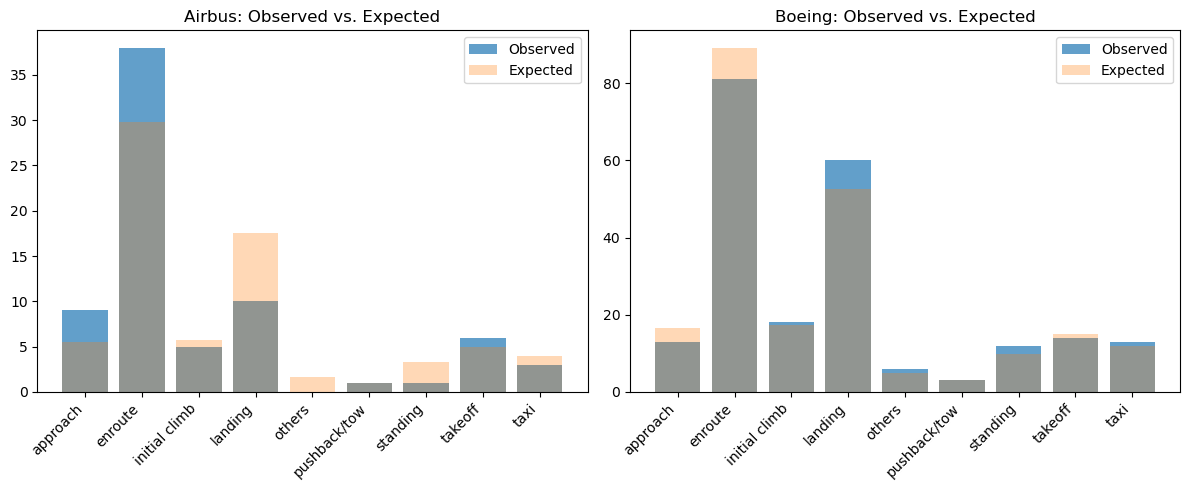

In [7]:
import matplotlib.pyplot as plt

# Phases of flight for labels
phases = ["approach", "enroute", "initial climb", "landing", "others", "pushback/tow", "standing", "takeoff", "taxi"]

# Observed and expected frequencies
observed_airbus = contingencyArray[:, 0]  # Airbus column
expected_airbus = expectedResult[:, 0]  # Expected for Airbus
observed_boeing = contingencyArray[:, 1]  # Boeing column
expected_boeing = expectedResult[:, 1]  # Expected for Boeing

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Airbus plot
ax1.bar(phases, observed_airbus, label="Observed", alpha=0.7)
ax1.bar(phases, expected_airbus, label="Expected", alpha=0.3)
ax1.set_title("Airbus: Observed vs. Expected")
ax1.set_xticks(range(len(phases)))
ax1.set_xticklabels(phases, rotation=45, ha="right")
ax1.legend()

# Boeing plot
ax2.bar(phases, observed_boeing, label="Observed", alpha=0.7)
ax2.bar(phases, expected_boeing, label="Expected", alpha=0.3)
ax2.set_title("Boeing: Observed vs. Expected")
ax2.set_xticks(range(len(phases)))
ax2.set_xticklabels(phases, rotation=45, ha="right")
ax2.legend()

plt.tight_layout()
plt.show()